In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/epoch/model.ckpt-30.00-24600'
model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf'
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  
                         image_model=image_model,
                         index=-1)

text_strs = np.load(os.path.join(valid_dir, 'distinct_text_strs.npy'))
img2text = np.load(os.path.join(valid_dir, 'img2text.npy')).item()

tensorflow_version: 1.4.0
checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature
preprocessing_fn net_name inception_resnet_v2 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_resnet_v2 height 299 width 299
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionResnetV2 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt
image_model: <melt.image.image_model.ImageModel object at 0x7f016a83d390>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt duration: 7.99908804893
ENCODE_UNK 1
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf/model.ckpt-34.15-28000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.idf/model.ckpt-34.15-28000.map duration: 0.739014148712


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: fed918d923cbde60b680da959d359941f6aed693.jpg


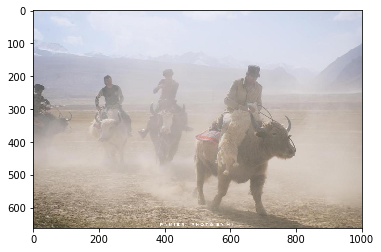

topwords of image:
0 刚出生 0.818976|1 摘瓜 0.768673|2 进网 0.705687|3 铲除 0.670579|4 费 0.668656|5 乒 0.655703|6 骑驴 0.641585|7 长相 0.636472|8 命 0.620942|9 太阳能 0.614214|10 相间 0.609011|11 绿莹莹 0.58644|12 凑 0.57899|13 水渠 0.555136|14 蓝天 0.54528|15 掘 0.542387|16 尔 0.533021|17 浊 0.532786|18 撑头 0.52983|19 草原 0.524203|20 无边无际 0.518812|21 城墙 0.518195|22 弥 0.511843|23 野果 0.508276|24 干枯 0.507461|25 桥墩 0.507212|26 狼 0.507011|27 烤鱼 0.505379|28 牛 0.501115|29 簸 0.497184|30 荒芜 0.496644|31 大胡子 0.493218|32 田间 0.490572|33 开阔 0.490514|34 牛头 0.487955|35 犁 0.484976|36 悲伤 0.483431|37 业 0.483004|38 绿叶 0.48191|39 如意 0.481537|40 x 0.481527|41 翼 0.480564|42 23 0.48018|43 宽旷 0.478758|44 波浪滔滔 0.476439|45 蜜 0.474646|46 有 0.472808|47 撑船 0.471217|48 克里 0.470334|49 跃 0.466795|50 鸽食 0.465455|51 放羊 0.465327|52 囊 0.464717|53 全 0.464348|54 野外 0.464137|55 兔子 0.463467|56 坎 0.462382|57 空旷 0.462247|58 长城 0.459473|59 无人机 0.458986|60 石滩 0.45839|61 洛克 0.458348|62 一群 0.457929|63 尘土飞扬 0.456552|64 茶园 0.453473|65 外切 0.452757|66 代步 0.452633|67 

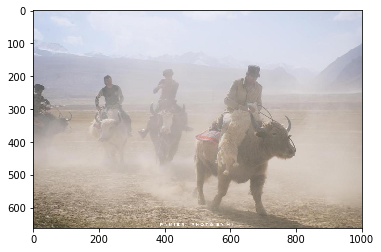

topwords of image:
0 刚出生 0.818976|1 摘瓜 0.768673|2 进网 0.705687|3 铲除 0.670579|4 费 0.668656|5 乒 0.655703|6 骑驴 0.641585|7 长相 0.636472|8 命 0.620942|9 太阳能 0.614214|10 相间 0.609011|11 绿莹莹 0.58644|12 凑 0.57899|13 水渠 0.555136|14 蓝天 0.54528|15 掘 0.542387|16 尔 0.533021|17 浊 0.532786|18 撑头 0.52983|19 草原 0.524203|20 无边无际 0.518812|21 城墙 0.518195|22 弥 0.511843|23 野果 0.508276|24 干枯 0.507461|25 桥墩 0.507212|26 狼 0.507011|27 烤鱼 0.505379|28 牛 0.501115|29 簸 0.497184|30 荒芜 0.496644|31 大胡子 0.493218|32 田间 0.490572|33 开阔 0.490514|34 牛头 0.487955|35 犁 0.484976|36 悲伤 0.483431|37 业 0.483004|38 绿叶 0.48191|39 如意 0.481537|40 x 0.481527|41 翼 0.480564|42 23 0.48018|43 宽旷 0.478758|44 波浪滔滔 0.476439|45 蜜 0.474646|46 有 0.472808|47 撑船 0.471217|48 克里 0.470334|49 跃 0.466795|50 鸽食 0.465455|51 放羊 0.465327|52 囊 0.464717|53 全 0.464348|54 野外 0.464137|55 兔子 0.463467|56 坎 0.462382|57 空旷 0.462247|58 长城 0.459473|59 无人机 0.458986|60 石滩 0.45839|61 洛克 0.458348|62 一群 0.457929|63 尘土飞扬 0.456552|64 茶园 0.453473|65 外切 0.452757|66 代步 0.452633|67 

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.966 seconds.
Prefix dict has been built succesfully.


牛
sim: [ 0.50111449]
text(q for exit): q
image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 03b64c98066f0f46ece6ca7dab77f4f9ed0bce53


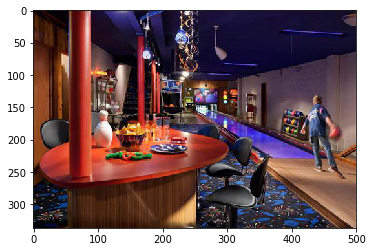

topwords of image:
0 会议室 0.633577|1 饭店 0.584034|2 桌子 0.581487|3 商店 0.569205|4 酒吧 0.561812|5 围坐在 0.557381|6 餐厅 0.539626|7 店铺 0.532296|8 吧 0.518403|9 教室 0.502379|10 柔和 0.493476|11 室 0.492031|12 商场 0.491014|13 浏览 0.488824|14 大厅 0.488633|15 迷宫 0.48338|16 椅子 0.480568|17 房屋里 0.479548|18 柜台 0.476691|19 城里 0.475959|20 剧 0.47363|21 背着手 0.473155|22 展览馆 0.471696|23 室内 0.470348|24 豪华 0.468711|25 接待 0.460552|26 桌上 0.454015|27 就餐 0.451903|28 宴会 0.446506|29 橱窗 0.446092|30 店 0.44511|31 生日 0.44323|32 服务员 0.442724|33 屋子里 0.44108|34 射击场 0.43796|35 武术馆 0.437678|36 展品 0.435382|37 大气 0.433561|38 桌椅 0.431777|39 办理 0.431114|40 坐 0.43109|41 桌前 0.428876|42 训练场 0.427858|43 办公室 0.425497|44 添 0.425043|45 内站 0.424243|46 公交站 0.424131|47 端茶 0.422499|48 装修 0.422386|49 金蛋 0.42077|50 客厅 0.420705|51 设备 0.420567|52 姿 0.420055|53 凿冰 0.418871|54 训 0.416913|55 旁倒 0.415839|56 桌边 0.415131|57 摆着 0.413916|58 中年人 0.413466|59 罗 0.409315|60 里开 0.409195|61 附近 0.409129|62 摆放 0.408494|63 展厅 0.406727|64 装饰 0.406508|65 美 0.405177|66 吧台 

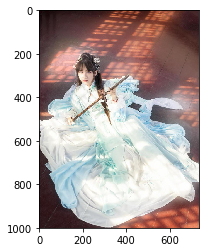

topwords of image:
0 凑 0.627616|1 棍子 0.595955|2 剑 0.561741|3 二胡 0.560809|4 舞台 0.542631|5 半袖 0.508284|6 黑暗 0.507358|7 蜘蛛 0.502468|8 婚纱 0.496396|9 木棍 0.476073|10 昏暗 0.471622|11 马头 0.468429|12 梁 0.467729|13 长衣 0.466751|14 袋子 0.451456|15 夜幕 0.450848|16 见 0.4499|17 情 0.447916|18 麻袋 0.44701|19 细雨 0.446088|20 塑料袋 0.443552|21 小提琴 0.44314|22 长杆 0.441373|23 杆子 0.439645|24 巧克粉 0.438277|25 照着 0.43702|26 上拉 0.434985|27 演奏 0.434174|28 地窖 0.429151|29 一个打 0.422712|30 袍 0.421876|31 灯 0.41979|32 袋装 0.41855|33 道具 0.417767|34 刀 0.417653|35 人盘 0.414872|36 围绕 0.414765|37 鹤 0.412608|38 旁拉 0.412048|39 页 0.407312|40 拂尘 0.403395|41 武器 0.403105|42 拐杖 0.402672|43 横抱 0.402326|44 光鲜亮丽 0.401532|45 垃圾 0.401409|46 拍杆 0.40129|47 锈 0.398887|48 烟枪 0.398263|49 唱着歌 0.397521|50 台球厅 0.396401|51 一根 0.396321|52 夺目 0.39244|53 棒子 0.392338|54 耙子 0.390022|55 夜空 0.389966|56 自 0.38566|57 拉琴 0.385462|58 开怀大笑 0.383063|59 一袋 0.382476|60 衣 0.382287|61 黑发 0.377571|62 美轮美奂 0.376436|63 骑驴 0.375327|64 绳子 0.374572|65 花束 0.372746|66 弹奏乐器 0.37

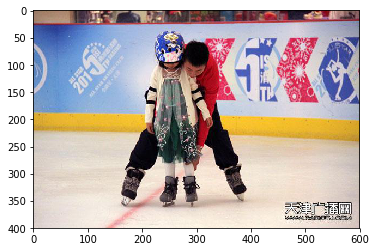

topwords of image:
0 刚出生 0.806198|1 摘瓜 0.803894|2 进网 0.663215|3 长相 0.662593|4 乒 0.662075|5 命 0.64422|6 铲除 0.638041|7 费 0.635994|8 冰球 0.612252|9 凑 0.593029|10 骑驴 0.569574|11 相间 0.565583|12 滑冰场 0.555079|13 野果 0.553738|14 撑头 0.538916|15 簸 0.53871|16 浊 0.536462|17 尔 0.535962|18 韩 0.521565|19 绿莹莹 0.521255|20 掘 0.519394|21 太阳能 0.515007|22 囊 0.511373|23 蓝天 0.49861|24 兔子 0.496858|25 浓 0.495694|26 冰球场 0.493792|27 弥 0.493681|28 业 0.493144|29 狼 0.491079|30 如意 0.488697|31 滑冰鞋 0.487022|32 溜冰场 0.484027|33 放羊 0.482274|34 克里 0.480036|35 低 0.478508|36 翼 0.477439|37 冰场 0.476978|38 面具 0.476508|39 代步 0.476041|40 大胡子 0.476014|41 晴空万里 0.473883|42 泡菜 0.473353|43 烤鱼 0.467997|44 蝙 0.46789|45 跃 0.465996|46 检 0.464737|47 全 0.463492|48 绿叶 0.461742|49 面上 0.459644|50 彩色 0.459112|51 灵堂 0.457995|52 凌 0.456796|53 坎 0.454628|54 十一号 0.453159|55 蚝 0.450388|56 洛克 0.448976|57 吹喇叭 0.444456|58 悲伤 0.444311|59 村 0.440714|60 炸丸子 0.440644|61 联 0.44003|62 外切 0.439147|63 无边无际 0.437416|64 口罩 0.436205|65 撑船 0.434131|66 面露 0.433099|6

In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  plt.subplot(1, 1, 1)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  i = 0
  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    text = text.replace(' ', '')
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))